In [1]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta
from pandas import DataFrame, concat, date_range, ExcelWriter, to_datetime
import os
from numpy import isnan, inf, mean
import time
import json
from Calculator import Calculator

from utils import getSchema, changedType
from BacktestBaseFunc import *


parent = os.path.dirname(os.path.abspath("__file__"))
output_path = os.path.join(parent, "Output", "HundredBreakOut")
if not os.path.isdir(output_path):
    os.makedirs(output_path)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
n = 5
endDate = datetime.today() + timedelta(-365 * n)
startDate = endDate + timedelta(-365)
df = StockInterDay(startDate, endDate,['2330']).set_index("Date")

In [19]:
n = 0
endDate = datetime.today() + timedelta(-365 * n)
startDate = endDate + timedelta(-365)
df = IndexInterDay(startDate, endDate,['發行量加權股價指數']).set_index("Date")

<AxesSubplot:xlabel='Date'>

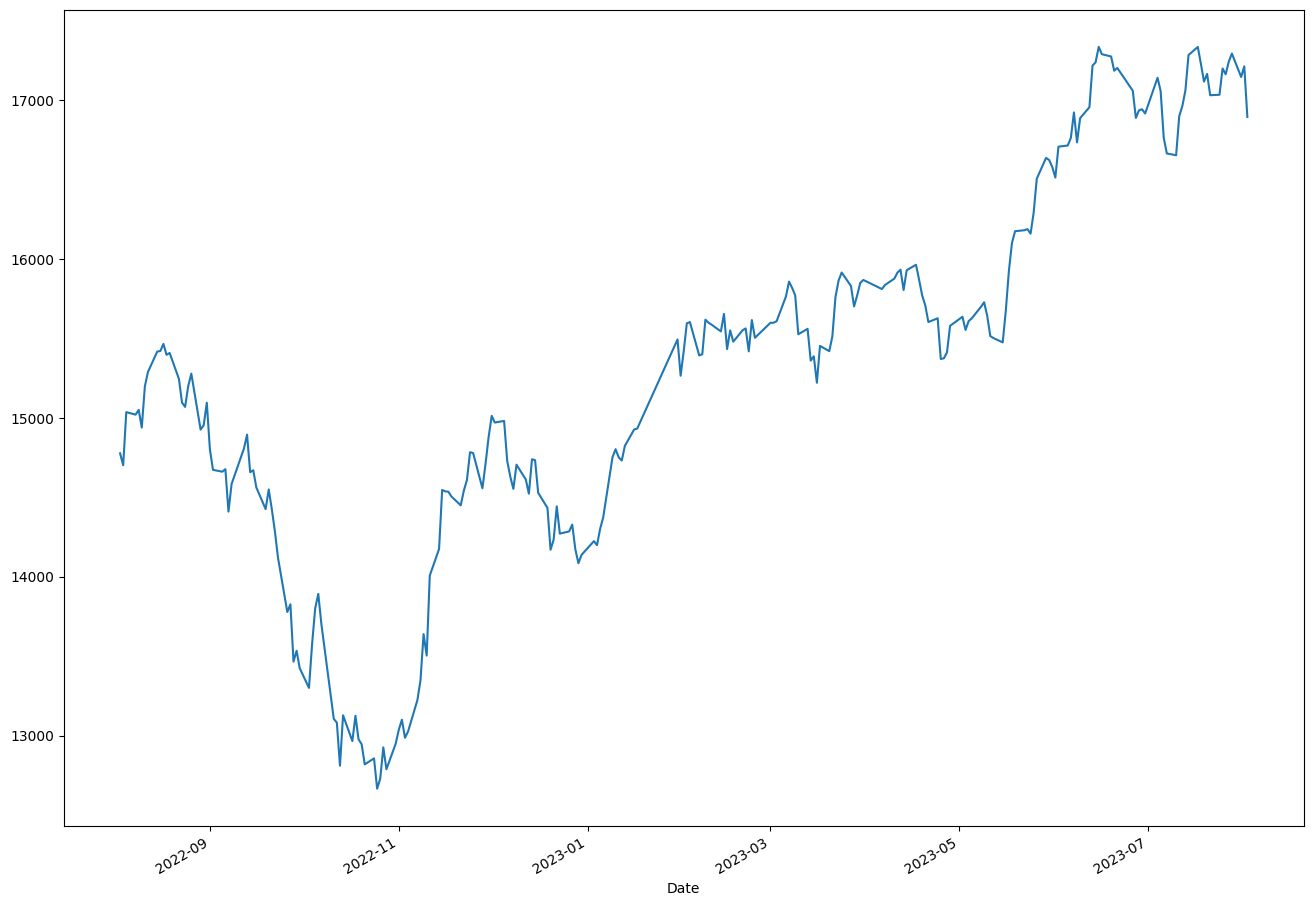

In [20]:
df['Close'].plot(figsize=(16,12))

In [22]:
sliced = df.loc['2023-01-01':, :]

In [23]:
sliced.head(50)

,_id,IndexName,Open,High,Low,Close
Date,,,,,,
2023-01-03,63b3d4e4bc964c21e9d4dd12,發行量加權股價指數,14137.69,14237.94,14001.97,14224.12
2023-01-04,63b526494a170934571e6ffa,發行量加權股價指數,14224.12,14257.45,14177.97,14199.13
2023-01-05,63b677ade9385b6492754195,發行量加權股價指數,14199.13,14357.60,14199.13,14301.05
2023-01-06,63b7c9243973de3ea52ad45c,發行量加權股價指數,14301.05,14384.92,14278.52,14373.34
2023-01-09,63bbbdfa981349cdd8f4386f,發行量加權股價指數,14373.34,14752.21,14373.34,14752.21
2023-01-10,63bd0f3a0beb572455733127,發行量加權股價指數,14752.21,14816.13,14728.56,14802.96
2023-01-11,63be60dd47f979d235e61368,發行量加權股價指數,14802.96,14842.74,14734.44,14751.44
2023-01-12,63bfb23e9a39d1a00aeb8e8d,發行量加權股價指數,14751.44,14813.31,14700.73,14731.64
2023-01-13,63c103cf4ab5142554c10f1a,發行量加權股價指數,14731.64,14962.31,14731.64,14824.13
